# 1. Importing the Packages

In [1]:
# Lets Import all the required packages
import os      #to make a connection between python prog and the machine directories

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

os.getcwd()

'C:\\Users\\H437428\\Documents\\UG\\Upgrad Samples\\C3. ML\\Assignment'

# 2. Data Sourcing

In [2]:
# Reading the Dataset
rental_data=pd.read_csv("day.csv")
rental_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Get an overview of the data and the null values(if any)
rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
rental_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3. Data Visualization
### 3.1. Heatmap

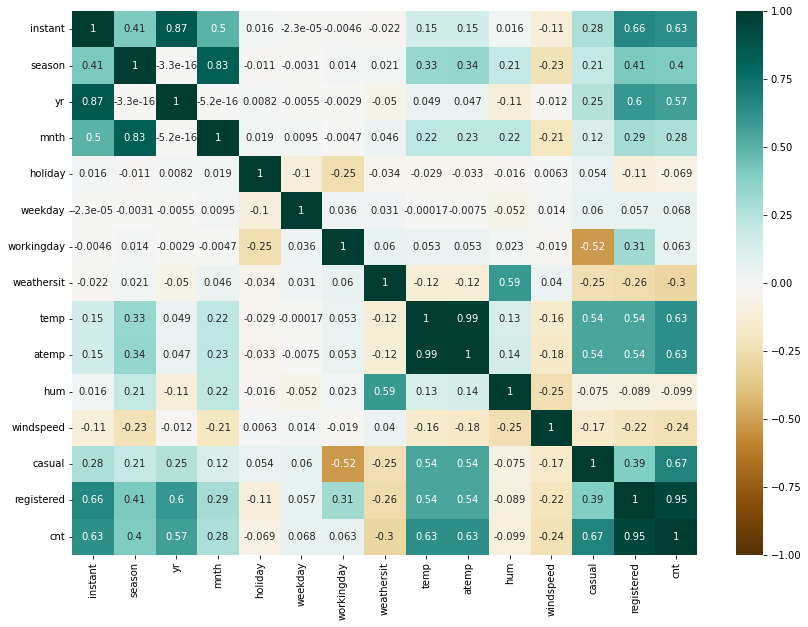

In [5]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(rental_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

### 3.2. PairPlot

For pairplot we need not consider all columns(for brevity in visualizing). 

E.g: 
1. Columns like "season", "weathersit" can be interpreted from "months", so they can be omitted.
2. Similarly we can interpret the data from "holiday" and "working day" columns from "weekday", hence can be omitted

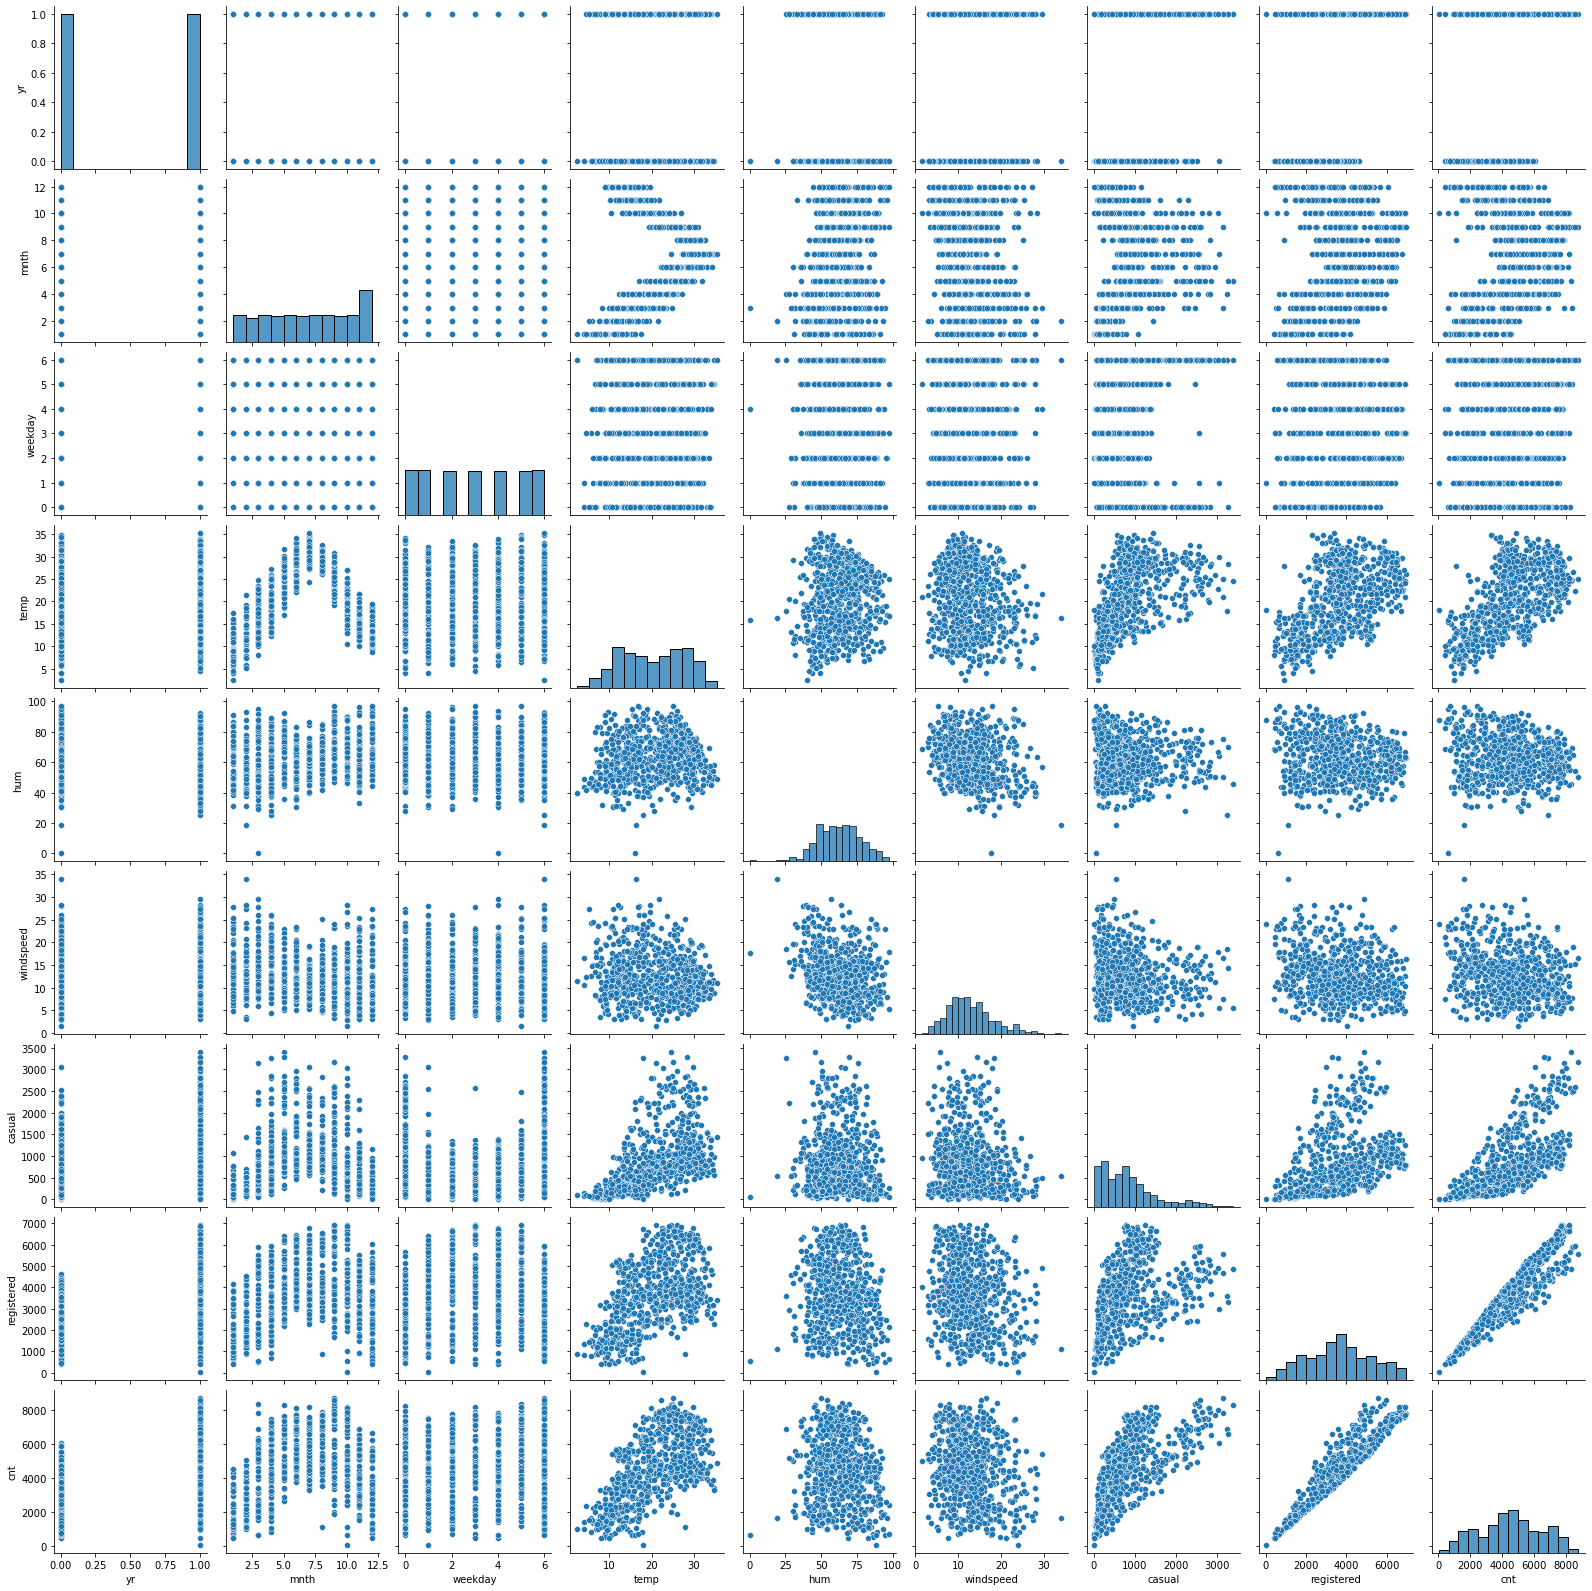

In [6]:
sns_df=rental_data.drop(['instant','dteday','season','holiday','workingday','weathersit','atemp'], axis = 1, inplace = False)
g=sns.pairplot(sns_df)
plt.show()

From the Pair plot, we can see that the target variable "cnt":
1. linearly depends on "temp","atemp","casual","registered" columns
2. we can see more and higher sales in the year with value 1(i.e.,2019). Implies company's performance increased positively as year progressed
3. There are decently higher range of "cnt" values between the "months" of 5-9. These are the months which have relatively higher temperatures(from mnth vs temp graph) which again explains the temp vs cnt linearity.

### 3.3. BoxPlot

In [7]:
# Before moving to Boxplot, lets see the number of unique entries in each column in the above dataset
print(sns_df.nunique())

yr              2
mnth           12
weekday         7
temp          498
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


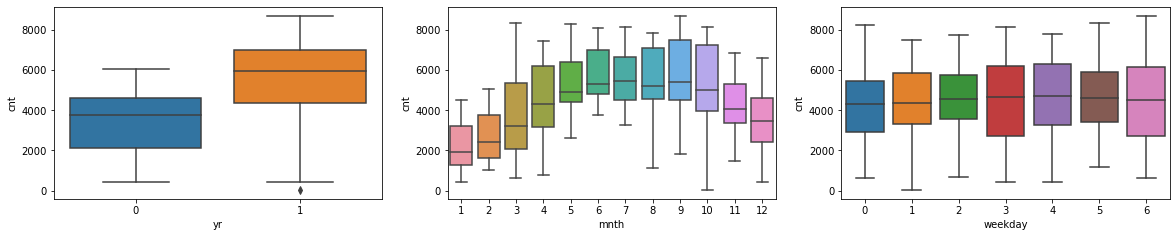

In [8]:
# Box plot needs columns which have limited number of unique values
box_df=sns_df.drop(['temp','hum','windspeed','casual','registered','cnt'], axis = 1, inplace = False)
plt.figure(figsize=(20, 12))
for i in range(len(list(box_df.columns))):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = list(box_df.columns)[i], y = 'cnt', data = sns_df)
plt.show()

1. Clearly the year 2019 has higher cnt than 2018
2. We can see the higher cnt in the months of 5-9 from the box plot as well from their Lower Quartile and Median values

# 4. Data Pre-processing(Preperation)

In [9]:
rental_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the above observations, we will remove:
1. "instant" columns since it has no significance
2. "dteday" since it can be interpreted from yr-mnth-weekday columns
3. "atemp" column since its is highly correlated with temp, and are almost same(from correlation matrix: 0.99)
4. "casual","registered" columns since they are the indirectly target variable themselves(casual+registered=cnt), having which will add unnecessary collinearity


In [10]:
d1= rental_data.drop(['instant','dteday','atemp','casual','registered'], axis = 1, inplace = False)
d1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### 4.1 Encoding with Dummy Variables
Since there is no Cardinal Relationship between values of "season" and "weathersit", we will encode them with dummy variables instead of having numerical values

In [11]:
en_season = pd.get_dummies(d1['season'], drop_first = True)
en_season.columns = ['summer', 'fall', 'winter']
en_season.drop_duplicates()

,summer,fall,winter
0,0,0,0
79,1,0,0
171,0,1,0
265,0,0,1


In [12]:
en_weathersit = pd.get_dummies(d1['weathersit'], drop_first = True)
en_weathersit.columns = ['weathersit2', 'weathersit3']
en_weathersit.drop_duplicates()

,weathersit2,weathersit3
0,1,0
2,0,0
25,0,1


In [13]:
d2 = pd.concat([d1, en_season, en_weathersit], axis = 1)
d2.drop(['season','weathersit'], axis = 1, inplace = True)
d2.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,weathersit2,weathersit3
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


### 4.2. Split the Data into Train and Test Data

In [14]:
# We will split the data with 70% data as Training Data and the other 30% as Test Data, with Random state as 100
np.random.seed(0)
df_train, df_test = train_test_split(d2, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.3. Scale the Train Data

In [15]:
# Since the units of variables are not same we will do Scaling. Here we are going with Standardization i.e., MinMax Scaling
scaler = MinMaxScaler()
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,weathersit2,weathersit3
653,1,0.818182,0,0.333333,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0


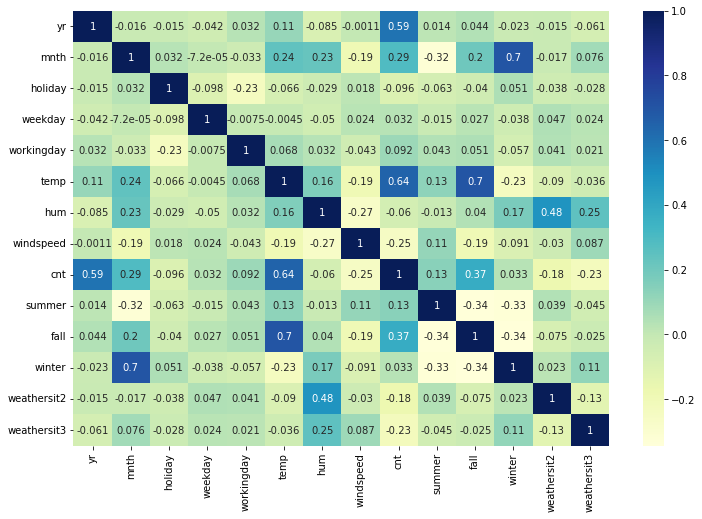

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 8))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# 5. Model Building

### 5.1. Model1:
From the Correlation Matrix, since we have maximum correlation with "temp" column, lets first build a basic Regression Model to see how it looks and understand the metric values

In [17]:
y_train = df_train.pop('cnt')
X_train = df_train

In [18]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           5.80e-61
Time:                        21:05:21   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

As we can see from the above Summary:
"Temp" column could able to explain 41.4% of the variance in the data. With P value at 0 and Prob(Static) reaching zero, we can add more data to the above model so as to increase the efficiency of the model

### 5.2. Model 2:
Lets add "yr" column which is the 2nd most correlated field in the dataset

In [19]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['yr']])

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.89e-49
Time:                        21:05:21   Log-Likelihood:                 148.31
No. Observations:                 510   AIC:                            -292.6
Df Residuals:                     508   BIC:                            -284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.108      0.0

### 5.3. Model 3:
As both Model 1 and Model 2 are significant contributors of the target variable, now lets add both these variables to see how it behaves as a MultiLinear Regression Model

In [20]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr']])

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.25e-130
Time:                        21:05:21   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

### 5.4. Model 4: With all Variables
Adding multiple variables seems to be a good approach but we cant always handpick and check each variable, so lets consider all the variables and drop off unnecessary variables from the model

In [21]:
X_train_lm = sm.add_constant(X_train)

lr4 = sm.OLS(y_train, X_train_lm).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.31e-183
Time:                        21:05:21   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1708      0.030      5.773      

#### Checking VIF

In [22]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,22.88
6,hum,17.56
1,mnth,13.87
9,fall,8.13
10,winter,7.20
7,windspeed,3.83
8,summer,3.52
4,workingday,3.14
3,weekday,3.03
11,weathersit2,2.14


### 5.5. Model 5:
#### all_variables-['hum']
1. Since we have "mnth" column with P>0.05 and "temp","hum","mnth","fall","winter" columns with VIF>5, we need to optimize these variables by removing Multicollinearity. 
2. Lets first consider VIF values.
    a. "temp" column has highest VIF but it is one of the most important factor for our Regression model(from pairplot).
    b. So lets remove the next higher VIF column which is "hum"

In [23]:
X_train = X_train.drop('hum', 1)
X_train_lm = sm.add_constant(X_train)

lr5 = sm.OLS(y_train, X_train_lm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.49e-182
Time:                        21:05:21   Log-Likelihood:                 490.63
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     497   BIC:                            -900.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0996      0.020      5.020      

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,16.49
1,mnth,13.24
8,fall,7.49
9,winter,7.17
6,windspeed,3.67
7,summer,3.46
4,workingday,2.96
3,weekday,2.93
0,yr,2.03
10,weathersit2,1.52


### 5.6. Model 6:
#### all_variables-['hum', 'mnth']
Now lets drop "mnth" column which has P>0.05 and VIF>10

In [25]:
X_train = X_train.drop('mnth', 1)

X_train_lm = sm.add_constant(X_train)

lr6 = sm.OLS(y_train, X_train_lm).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.96e-184
Time:                        21:05:21   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1003      0.019      5.166      

In [26]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,15.84
7,fall,6.19
5,windspeed,3.62
6,summer,3.33
3,workingday,2.95
2,weekday,2.89
8,winter,2.39
0,yr,2.03
9,weathersit2,1.52
10,weathersit3,1.08


### 5.7. Model 7:
#### all_variables-['hum','mnth','fall']
1. As we can see, after removing "hum" and "mnth" columns, all the P values are <0.05 and all the VIF values except for "temp" are <10.
2. But we want to have the "temp" VIF to be less than 10. Since we cant drop this column directly lets remove the most correlated column of "temp" variable. When we look into the correlation matrix, it comes out to be "fall" column which is coincidentally the next highest VIF variable after "temp". So lets goahead and drop "fall" column 

In [27]:
X_train = X_train.drop('fall', 1)

X_train_lm = sm.add_constant(X_train)

lr7 = sm.OLS(y_train, X_train_lm).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.36e-181
Time:                        21:05:21   Log-Likelihood:                 482.72
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     499   BIC:                            -896.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0858      0.019      4.435      

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,4.39
5,windspeed,3.43
3,workingday,2.94
2,weekday,2.88
0,yr,2.01
8,weathersit2,1.52
6,summer,1.50
7,winter,1.40
9,weathersit3,1.08
1,holiday,1.07


Now, we got a final model with least Multicollinearity(VIF<5), decent vraiable importances(P<0.05), fair R-squared value and Prob(F-statistic)->0. Which means the model parameters are considerable important with less Multicollinearity and the model is reasonably good

# 6. Residual Analysis of the Train Data

In [29]:
y_train_lm = lr7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

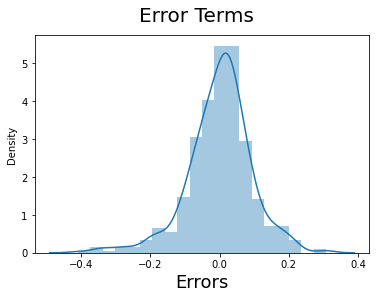

In [30]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# 7. Making Predictions using the Final Model

In [31]:
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test

In [32]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_lm = X_test_lm.drop(["hum", "mnth", "fall"], axis = 1)

# Making predictions using the fourth model
y_pred_lm = lr7.predict(X_test_lm)

# 8. Model Evalutaion

Text(0, 0.5, 'y_pred')

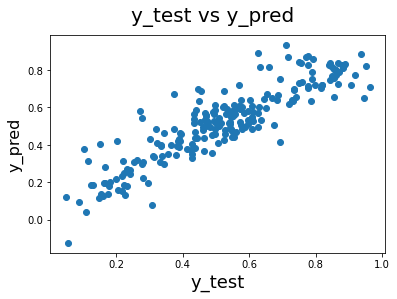

In [33]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [34]:
r2_score(y_true=y_test,y_pred=y_pred_lm)

0.7897147602879868

### Thus, we have reached to a decent model with r2_score for Training data as 82.5% and Test Data as 78.9%






# Add on Modelling with RFE

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(d2, train_size = 0.7, test_size = 0.3, random_state = 100)

scaler = MinMaxScaler()
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

y_train = df_train.pop('cnt')
X_train = df_train

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('weathersit2', True, 1),
 ('weathersit3', True, 1)]

In [37]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday'], dtype='object')

In [38]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1: (RFE)

In [39]:
X_train_lm = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_lm).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.78e-183
Time:                        21:05:22   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2178      0.028      7.788      

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.67
3,hum,15.02
6,fall,6.48
4,windspeed,3.63
5,summer,3.36
7,winter,2.48
8,weathersit2,2.13
0,yr,2.02
9,weathersit3,1.17
1,holiday,1.04


### Model 2: (RFE-["hum"])

In [41]:
X_train_rfe = X_train_rfe.drop('hum', 1)

X_train_lm = sm.add_constant(X_train_rfe)

lr9 = sm.OLS(y_train, X_train_lm).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.42e-181
Time:                        21:05:22   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1400      0.018      7.981      

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.12
5,fall,6.14
4,summer,3.32
3,windspeed,3.26
6,winter,2.39
0,yr,2.02
7,weathersit2,1.47
8,weathersit3,1.08
1,holiday,1.03


### Model 3: (RFE-["hum","fall"])

In [43]:
X_train_rfe = X_train_rfe.drop('fall', 1)

X_train_lm = sm.add_constant(X_train_rfe)

lr10 = sm.OLS(y_train, X_train_lm).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.72e-179
Time:                        21:05:22   Log-Likelihood:                 471.98
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1257      0.017      7.221      

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.33
3,windspeed,3.03
0,yr,2.00
4,summer,1.50
6,weathersit2,1.47
5,winter,1.37
7,weathersit3,1.08
1,holiday,1.03


# Residual Analysis of the Train Data

In [45]:
y_train_lm = lr10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

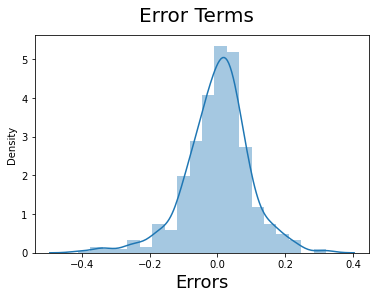

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Making Predictions using the Final Model

In [47]:
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test

In [48]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_lm = X_test_lm.drop(["mnth", "weekday", "workingday","hum", "fall"], axis = 1)

# Making predictions using the fourth model
y_pred_lm = lr10.predict(X_test_lm)

# Model Evalutaion

Text(0, 0.5, 'y_pred')

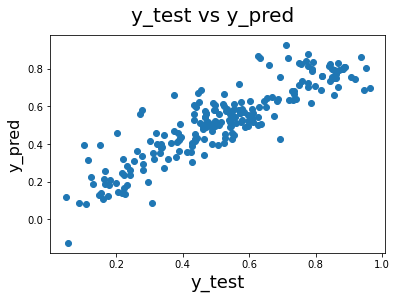

In [49]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [50]:
r2_score(y_true=y_test,y_pred=y_pred_lm)

0.78652732256546

#### As we can see, all though the columns in Model 7 and RFE Model 3 are slightly different, we finally got similar r2_squares in both models.
1. The r2_score for RFE Final model for Training Data is 81.7% and for Testing Data is 78.6%
2. The r2_score for our final manual Model(Model 7) is 82.5% and 78.9%
